In [51]:
from statsbombpy import sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mplsoccer import Pitch, Sbopen
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)

In [52]:
competitionId = 9 # Bundesliga
seasonId = 281 # 2023/2024

matches = sb.matches(competition_id = competitionId, season_id = seasonId)
match_ids = matches['match_id'].tolist()
print(match_ids)

[3895302, 3895292, 3895333, 3895340, 3895348, 3895286, 3895220, 3895250, 3895266, 3895275, 3895180, 3895134, 3895121, 3895107, 3895074, 3895139, 3895086, 3895320, 3895309, 3895258, 3895244, 3895232, 3895210, 3895202, 3895194, 3895182, 3895167, 3895158, 3895153, 3895113, 3895095, 3895067, 3895060, 3895052]


In [53]:
parser = Sbopen()
matchId = 3895333
df, related, freeze, tactics = parser.event(matchId)

df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_goal_assist,shot_one_on_one,foul_committed_offensive,foul_won_defensive,foul_committed_penalty,foul_won_penalty,substitution_replacement_id,substitution_replacement_name,pass_deflected,pass_cut_back
0,c22f124a-cbfb-441e-8f42-3818990f879f,1,1,00:00:00,0,0,1,0.000000,3895333,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f0dd7cfd-6912-4d11-b095-eda30045a7e9,2,1,00:00:00,0,0,1,0.000000,3895333,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1d1f9bd6-f519-4efa-ba23-ffa36a6acd05,3,1,00:00:00,0,0,1,0.000000,3895333,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d46f796-7c18-450a-b98a-1671f7e0aa29,4,1,00:00:00,0,0,1,0.000000,3895333,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77806383-7cfd-45ee-b547-c6c2c8aeb349,5,1,00:00:00.684000,0,0,2,1.278379,3895333,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
teams = df['team_name'].unique()

team1 = df[df['team_name'] == teams[0]]
team2 = df[df['team_name'] == teams[1]]

passesTeam1 = team1[team1['type_name'] == 'Pass']
passesTeam2 = team2[team2['type_name'] == 'Pass']

In [55]:
passesTeam1 = passesTeam1[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]
passesTeam2 = passesTeam2[['id','minute','player_id','player_name','x','y','end_x', 'end_y','pass_recipient_id','pass_recipient_name','outcome_id','outcome_name']]

passesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
9,6dfa4e06-a66e-4924-a95a-3b136ac89ed6,0,33088.0,Lucas Silva Melo,33.6,80.0,35.5,70.5,3767.0,Ellyes Joris Skhiri,NaN,NaN
13,9ce86705-6023-463e-a536-87f7b98676df,0,3767.0,Ellyes Joris Skhiri,35.8,71.0,34.3,78.0,33088.0,Lucas Silva Melo,NaN,NaN
16,f644451d-3988-481a-89fc-e4209eead339,0,33088.0,Lucas Silva Melo,33.7,77.9,65.8,61.3,40761.0,Omar Marmoush,9.0,Incomplete
25,c3e3264f-62bd-4cbf-bf23-9fdc3c3f0fac,0,8227.0,Mario Götze,44.0,60.1,39.7,62.1,13294.0,Robin Koch,NaN,NaN
27,100e0e8f-ac9d-4fac-bb81-822d2d6cf36f,0,13294.0,Robin Koch,39.7,62.1,55.9,36.6,40761.0,Omar Marmoush,9.0,Incomplete


In [56]:
successfulPassesTeam1 = passesTeam1[passesTeam1['outcome_name'].isnull()]
successfulPassesTeam2 = passesTeam2[passesTeam2['outcome_name'].isnull()]

successfulPassesTeam1.head()

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
9,6dfa4e06-a66e-4924-a95a-3b136ac89ed6,0,33088.0,Lucas Silva Melo,33.6,80.0,35.5,70.5,3767.0,Ellyes Joris Skhiri,NaN,NaN
13,9ce86705-6023-463e-a536-87f7b98676df,0,3767.0,Ellyes Joris Skhiri,35.8,71.0,34.3,78.0,33088.0,Lucas Silva Melo,NaN,NaN
25,c3e3264f-62bd-4cbf-bf23-9fdc3c3f0fac,0,8227.0,Mario Götze,44.0,60.1,39.7,62.1,13294.0,Robin Koch,NaN,NaN
37,0d83fd71-fc42-483b-ba0b-6dea12ef5436,0,50429.0,Hugo Ekitike,57.0,58.2,56.1,76.5,28346.0,Eric Junior Dina Ebimbe,NaN,NaN
40,221354d2-1f93-4129-9a9e-0f2855f279b0,0,28346.0,Eric Junior Dina Ebimbe,64.9,78.6,51.5,74.9,33088.0,Lucas Silva Melo,NaN,NaN


In [57]:
subsTeam1 = team1[team1['type_name'] == 'Substitution']
subsTeam2 = team2[team2['type_name'] == 'Substitution']

firstSubTeam1 = subsTeam1['minute'].min()
firstSubTeam2 = subsTeam2['minute'].min()

print(firstSubTeam1, firstSubTeam2)

69 60


In [58]:
successfulPassesTeam1 = successfulPassesTeam1[successfulPassesTeam1['minute'] < firstSubTeam1]
successfulPassesTeam2 = successfulPassesTeam2[successfulPassesTeam2['minute'] < firstSubTeam2]

successfulPassesTeam1.head()  

,id,minute,player_id,player_name,x,y,end_x,end_y,pass_recipient_id,pass_recipient_name,outcome_id,outcome_name
9,6dfa4e06-a66e-4924-a95a-3b136ac89ed6,0,33088.0,Lucas Silva Melo,33.6,80.0,35.5,70.5,3767.0,Ellyes Joris Skhiri,NaN,NaN
13,9ce86705-6023-463e-a536-87f7b98676df,0,3767.0,Ellyes Joris Skhiri,35.8,71.0,34.3,78.0,33088.0,Lucas Silva Melo,NaN,NaN
25,c3e3264f-62bd-4cbf-bf23-9fdc3c3f0fac,0,8227.0,Mario Götze,44.0,60.1,39.7,62.1,13294.0,Robin Koch,NaN,NaN
37,0d83fd71-fc42-483b-ba0b-6dea12ef5436,0,50429.0,Hugo Ekitike,57.0,58.2,56.1,76.5,28346.0,Eric Junior Dina Ebimbe,NaN,NaN
40,221354d2-1f93-4129-9a9e-0f2855f279b0,0,28346.0,Eric Junior Dina Ebimbe,64.9,78.6,51.5,74.9,33088.0,Lucas Silva Melo,NaN,NaN


In [59]:
averagePosTeam1 = successfulPassesTeam1.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count'] }).reset_index()
averagePosTeam2 = successfulPassesTeam2.groupby('player_name').agg({'x':'mean', 'y':['mean', 'count']}).reset_index()

averagePosTeam1.columns = ['player_name', 'x', 'y', 'count']
averagePosTeam2.columns = ['player_name', 'x', 'y', 'count']

averagePosTeam1.head()

,player_name,x,y,count
0,Ellyes Joris Skhiri,54.944186,43.386047,43
1,Eric Junior Dina Ebimbe,65.186667,59.340000,15
2,Fares Chaïbi,75.792308,24.838462,13
3,Hugo Ekitike,68.378571,44.021429,14
4,Kevin Trapp,13.425000,42.081250,16


In [60]:
passesToTeam1 = successfulPassesTeam1.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam1.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam2 = successfulPassesTeam2.groupby(['player_name','pass_recipient_name']).id.count().reset_index()
passesToTeam2.rename(columns={'id':'pass_count'},inplace=True)

passesToTeam1.head()

,player_name,pass_recipient_name,pass_count
0,Ellyes Joris Skhiri,Eric Junior Dina Ebimbe,2
1,Ellyes Joris Skhiri,Fares Chaïbi,5
2,Ellyes Joris Skhiri,Hugo Ekitike,3
3,Ellyes Joris Skhiri,Kevin Trapp,2
4,Ellyes Joris Skhiri,Lucas Silva Melo,4


In [61]:
passesToTeam1['sorted_pair'] = passesToTeam1.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam1.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam1 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam1 = passesBetweenTeam1.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesToTeam2['sorted_pair'] = passesToTeam2.apply(
    lambda row: tuple(sorted([row['player_name'], row['pass_recipient_name']])),
    axis=1
)

grouped = passesToTeam2.groupby('sorted_pair', as_index=False)['pass_count'].sum()
grouped[['player_a', 'player_b']] = pd.DataFrame(grouped['sorted_pair'].tolist(), index=grouped.index)
passesBetweenTeam2 = grouped[['player_a', 'player_b', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2.sort_values(by=['player_a', 'player_b']).reset_index(drop=True)

passesBetweenTeam1.head()

,player_a,player_b,pass_count
0,Ellyes Joris Skhiri,Eric Junior Dina Ebimbe,7
1,Ellyes Joris Skhiri,Fares Chaïbi,6
2,Ellyes Joris Skhiri,Hugo Ekitike,8
3,Ellyes Joris Skhiri,Kevin Trapp,4
4,Ellyes Joris Skhiri,Lucas Silva Melo,6


In [62]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_a', right_on='player_name')
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_a', right_on='player_name')

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count
0,Ellyes Joris Skhiri,Eric Junior Dina Ebimbe,7,Ellyes Joris Skhiri,54.944186,43.386047,43
1,Ellyes Joris Skhiri,Fares Chaïbi,6,Ellyes Joris Skhiri,54.944186,43.386047,43
2,Ellyes Joris Skhiri,Hugo Ekitike,8,Ellyes Joris Skhiri,54.944186,43.386047,43
3,Ellyes Joris Skhiri,Kevin Trapp,4,Ellyes Joris Skhiri,54.944186,43.386047,43
4,Ellyes Joris Skhiri,Lucas Silva Melo,6,Ellyes Joris Skhiri,54.944186,43.386047,43


In [63]:
passesBetweenTeam1 = pd.merge(passesBetweenTeam1, averagePosTeam1, left_on='player_b', right_on='player_name', suffixes=('', '_end'))
passesBetweenTeam2 = pd.merge(passesBetweenTeam2, averagePosTeam2, left_on='player_b', right_on='player_name', suffixes=('', '_end'))

passesBetweenTeam1.head()

,player_a,player_b,pass_count,player_name,x,y,count,player_name_end,x_end,y_end,count_end
0,Ellyes Joris Skhiri,Eric Junior Dina Ebimbe,7,Ellyes Joris Skhiri,54.944186,43.386047,43,Eric Junior Dina Ebimbe,65.186667,59.340000,15
1,Ellyes Joris Skhiri,Fares Chaïbi,6,Ellyes Joris Skhiri,54.944186,43.386047,43,Fares Chaïbi,75.792308,24.838462,13
2,Ellyes Joris Skhiri,Hugo Ekitike,8,Ellyes Joris Skhiri,54.944186,43.386047,43,Hugo Ekitike,68.378571,44.021429,14
3,Ellyes Joris Skhiri,Kevin Trapp,4,Ellyes Joris Skhiri,54.944186,43.386047,43,Kevin Trapp,13.425000,42.081250,16
4,Ellyes Joris Skhiri,Lucas Silva Melo,6,Ellyes Joris Skhiri,54.944186,43.386047,43,Lucas Silva Melo,56.784615,69.012821,39


In [64]:
passesBetweenTeam1 = passesBetweenTeam1[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]
passesBetweenTeam2 = passesBetweenTeam2[['player_a', 'x', 'y', 'count', 'player_b', 'x_end', 'y_end', 'count_end', 'pass_count']]

passesBetweenTeam1.head()

,player_a,x,y,count,player_b,x_end,y_end,count_end,pass_count
0,Ellyes Joris Skhiri,54.944186,43.386047,43,Eric Junior Dina Ebimbe,65.186667,59.340000,15,7
1,Ellyes Joris Skhiri,54.944186,43.386047,43,Fares Chaïbi,75.792308,24.838462,13,6
2,Ellyes Joris Skhiri,54.944186,43.386047,43,Hugo Ekitike,68.378571,44.021429,14,8
3,Ellyes Joris Skhiri,54.944186,43.386047,43,Kevin Trapp,13.425000,42.081250,16,4
4,Ellyes Joris Skhiri,54.944186,43.386047,43,Lucas Silva Melo,56.784615,69.012821,39,6


In [65]:
lineup = parser.lineup(matchId)
team1Lineup = lineup[lineup['team_name'] == teams[0]]
team2Lineup = lineup[lineup['team_name'] == teams[1]]

team1Lineup = team1Lineup[['player_name', 'player_nickname']]
team2Lineup = team2Lineup[['player_name', 'player_nickname']]

team1Lineup.head()

,player_name,player_nickname
20,Ellyes Joris Skhiri,Ellyes Joris Skhiri
21,Kevin Trapp,Kevin Trapp
22,Mario Götze,Mario Götze
23,Philipp Max,Philipp Max
24,Timothy Chandler,Timothy Chandler


In [66]:
averagePosTeam1 = pd.merge(averagePosTeam1, team1Lineup, on='player_name', how='left')
averagePosTeam2 = pd.merge(averagePosTeam2, team2Lineup, on='player_name', how='left')

averagePosTeam1.head()

,player_name,x,y,count,player_nickname
0,Ellyes Joris Skhiri,54.944186,43.386047,43,Ellyes Joris Skhiri
1,Eric Junior Dina Ebimbe,65.186667,59.340000,15,Éric Ebimbe
2,Fares Chaïbi,75.792308,24.838462,13,Fares Chaïbi
3,Hugo Ekitike,68.378571,44.021429,14,Hugo Ekitike
4,Kevin Trapp,13.425000,42.081250,16,Kevin Trapp


In [67]:
goals = df[df['type_name'] == 'Shot']
goals = goals[goals['outcome_name'] == 'Goal']
goals = goals[['minute', 'team_name']]

team1Goals = goals[goals['team_name'] == teams[0]]
team2Goals = goals[goals['team_name'] == teams[1]]

team1Goals = team1Goals[team1Goals['minute'] < firstSubTeam1]
team2Goals = team2Goals[team2Goals['minute'] < firstSubTeam2]

team1Goals = len(team1Goals)
team2Goals = len(team2Goals)

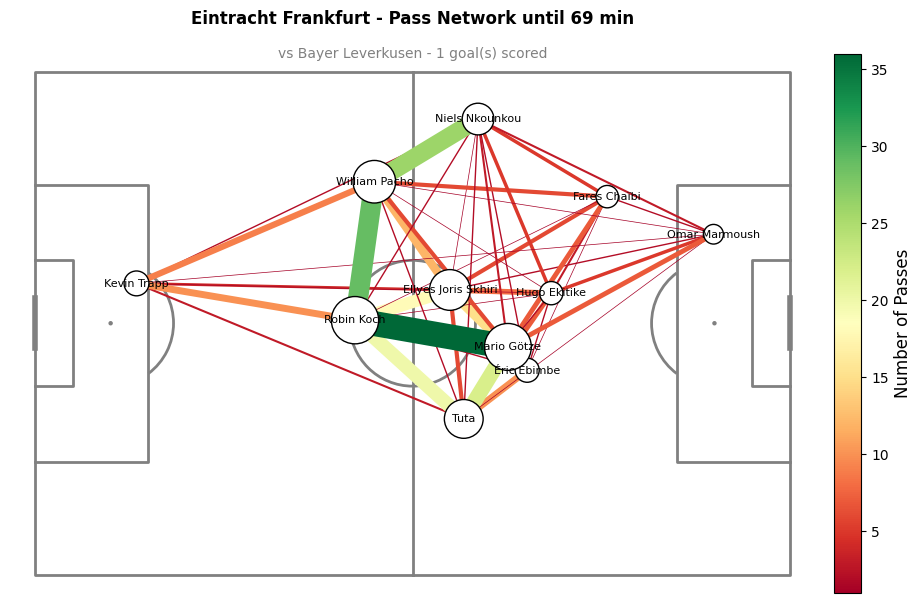

In [68]:
pass_between = passesBetweenTeam1
average_locations = averagePosTeam1
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam1) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - ' + str(team1Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()

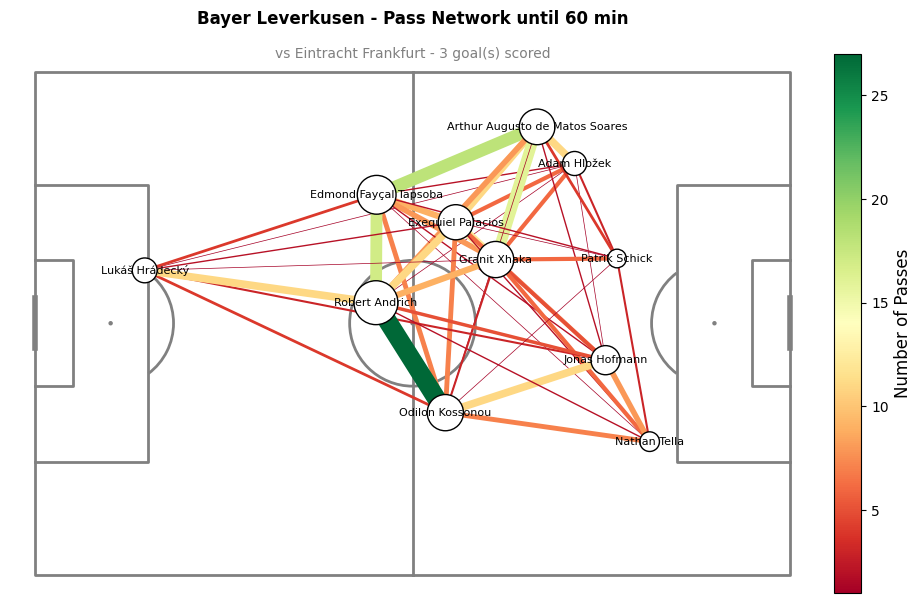

In [69]:
pass_between = passesBetweenTeam2
average_locations = averagePosTeam2
norm = colors.Normalize(vmin=pass_between['pass_count'].min(), vmax=pass_between['pass_count'].max())
cmap = cm.RdYlGn
scalar_map = cm.ScalarMappable(norm=norm, cmap=cmap)
pass_colors = scalar_map.to_rgba(pass_between['pass_count'])

pitch = Pitch(pitch_color='white', line_color='gray')
fig, ax = pitch.draw(figsize=(10, 8))

pitch.lines(
    1.2 * pass_between['x'], 
    0.8 * pass_between['y'],
    1.2 * pass_between['x_end'], 
    0.8 * pass_between['y_end'],
    lw=pass_between['pass_count'] * 0.5,
    color=pass_colors,
    zorder=1,
    ax=ax
)

scalar_map.set_array(pass_between['pass_count'])
cbar = plt.colorbar(scalar_map, ax=ax, orientation='vertical', pad=0.02, shrink=0.7)
cbar.set_label('Number of Passes', fontsize=12)

nodes = pitch.scatter(1.2*average_locations.x,0.8*average_locations.y,s=20*average_locations['count'].values,color='white',edgecolors='black',linewidth=1,ax=ax)

for index,row in average_locations.iterrows():
    pitch.annotate(row['player_nickname'], xy=(1.2*row["x"],0.8*row["y"]), c='black', va='center', ha='center', size=8, ax=ax)

title = team2[team2['team_name'] == teams[1]]['team_name'].values[0] + ' - Pass Network until '  + str(firstSubTeam2) + ' min'
    
ax.set_title(title,va='center',ha='center',fontsize=12,fontweight='bold',pad=20)

subtitle = 'vs ' + team1[team1['team_name'] == teams[0]]['team_name'].values[0] + ' - ' + str(team2Goals) + ' goal(s) scored'

ax.annotate(subtitle, xy=(0.5, 1), xytext=(0, 0),
             xycoords='axes fraction', textcoords='offset points',
             fontsize=10, color='gray', va='top', ha='center')


plt.tight_layout()
plt.show()